# **Packages** **Imported**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [ ]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose,MaxPooling2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import os
from time import time
import numpy as np

# **Adding** **Noise**

In [ ]:
def salt_pepper_noise(DIR,path):
  count=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    noise_img = random_noise(image, mode='s&p',amount=0.3)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(path+str(count)+'.png',noise_img) 
    count+=1



In [ ]:
salt_pepper_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train/Benign','/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Train/Benign/salt_pepper_noise')

In [ ]:
salt_pepper_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train/Malignant','/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Train/Malignant/salt_pepper_noise')

KeyboardInterrupt: ignored

In [ ]:
def Gaussian_noise(DIR,path):
  c1=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    img_gauss = cv2.add(image,gauss)
    cv2.imwrite(path+str(c1)+'.png',img_gauss) 
    c1+=1

In [ ]:
Gaussian_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train/Benign','/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Train/Benign/Gaussian_noise')

In [ ]:
Gaussian_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train/Malignant','/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Train/Malignant/Gaussian_noise')

In [ ]:
def speckle_noise(DIR,path):
  c2=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    noise = image + image * gauss
    cv2.imwrite(path+str(c2)+'.png',noise) 
    c2+=1

In [ ]:
speckle_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train/Benign','/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Train/Benign/speckle_noise')

In [ ]:
speckle_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train/Malignant','/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Train/Malignant/speckle_noise')

# **Loading** **DataSet**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset_path = '/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Train'

images = []
labels = []

for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  

  for image_filename in os.listdir(subfolder_path):
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    labels.append(subfolder)


df = pd.DataFrame({'image': images, 'label': labels})

In [ ]:

dataset_path = '/content/gdrive/MyDrive/Breast Cancer DataSet (2)/Test'

images = []
labels = []


for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  
  
  for image_filename in os.listdir(subfolder_path):
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    labels.append(subfolder)


df1 = pd.DataFrame({'image': images, 'label': labels})

In [ ]:
df1.tail()

,image,label
124,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
125,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
126,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
127,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
128,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant


In [ ]:
df.tail()

,image,label
3983,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3984,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3985,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3986,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3987,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train=df['image']
X_test=df1['image']
y_train=df['label']
y_test=df1['label']


# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})




In [ ]:
df_train = df_train.sample(frac = 1)

In [ ]:
df_test = df_test.sample(frac = 1)

In [ ]:
df_train.reset_index(drop=True)

,image,label
0,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
1,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
2,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
3,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
4,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
...,...,...
3983,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3984,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3985,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3986,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign


In [ ]:
df_test.reset_index(drop=True)

,image,label
0,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
1,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
2,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
3,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
4,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
...,...,...
124,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
125,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Benign
126,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant
127,/content/gdrive/MyDrive/Breast Cancer DataSet ...,Malignant


In [ ]:
print(len(df_train))

3988


In [ ]:
print(len(df_test))

129


In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Data** **Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_size = (227, 227)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator( rescale = 1./255) 


train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)


test_generator =test_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


# **Alex**  **Net**

In [ ]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X=  Dropout(0.5 ,name="d0")(X)
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X=  Dropout(0.5,name="d1")(X)
    X = Dense(2,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
img_shape = [227,227,3]
alex = AlexNet(img_shape)

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.keras import PlotLossesCallback

In [ ]:
# ModelCheckpoint callback - save best weights
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.keras import PlotLossesCallback
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

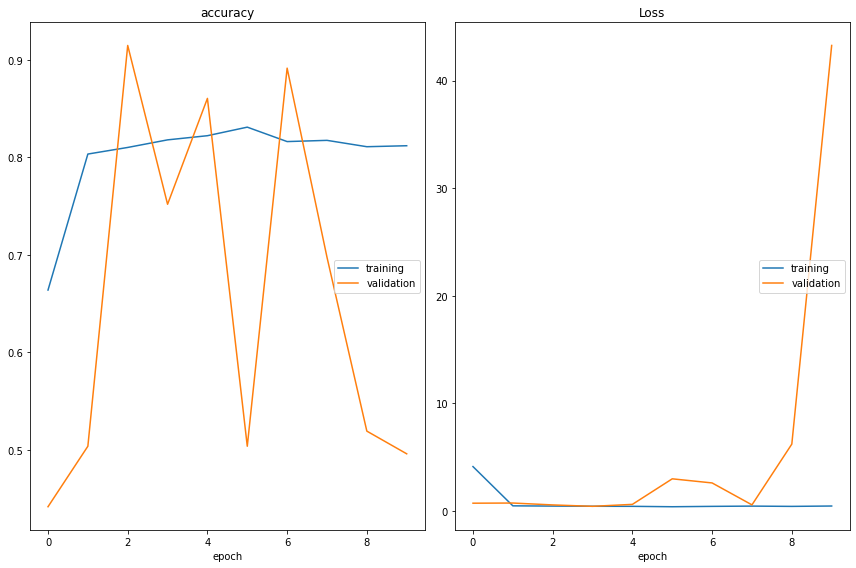

accuracy
	training         	 (min:    0.664, max:    0.831, cur:    0.812)
	validation       	 (min:    0.442, max:    0.915, cur:    0.496)
Loss
	training         	 (min:    0.382, max:    4.114, cur:    0.448)
	validation       	 (min:    0.419, max:   43.265, cur:   43.265)
125/125 [==============================] - 98s 783ms/step - loss: 0.4482 - accuracy: 0.8119 - val_loss: 43.2654 - val_accuracy: 0.4961


In [ ]:
model_history = alex.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_1, early_stop,PlotLossesCallback()],
                            verbose=1)

In [ ]:
alex.load_weights('tl_model_v1.weights.best.hdf5')

In [ ]:
metrics = alex.evaluate(test_generator)

5/5 [==============================] - 4s 833ms/step - loss: 0.5501 - accuracy: 0.9147


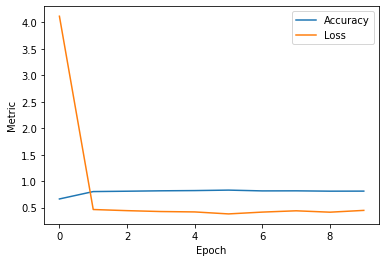

In [ ]:
history = model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = alex.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

5/5 [==============================] - 2s 383ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("Alex Model Accuracy : {:.2f}%".format(model_acc * 100))

Alex Model Accuracy : 91.47%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

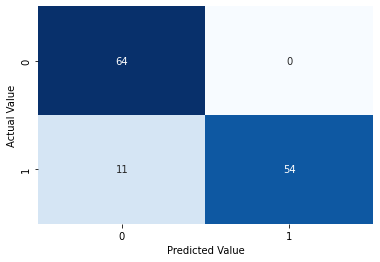

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        64
           1       1.00      0.83      0.91        65

    accuracy                           0.91       129
   macro avg       0.93      0.92      0.91       129
weighted avg       0.93      0.91      0.91       129



# **VGG16**

In [ ]:
image_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
#opt = Adam(lr=0.001)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_890 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_891 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_892 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_893 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

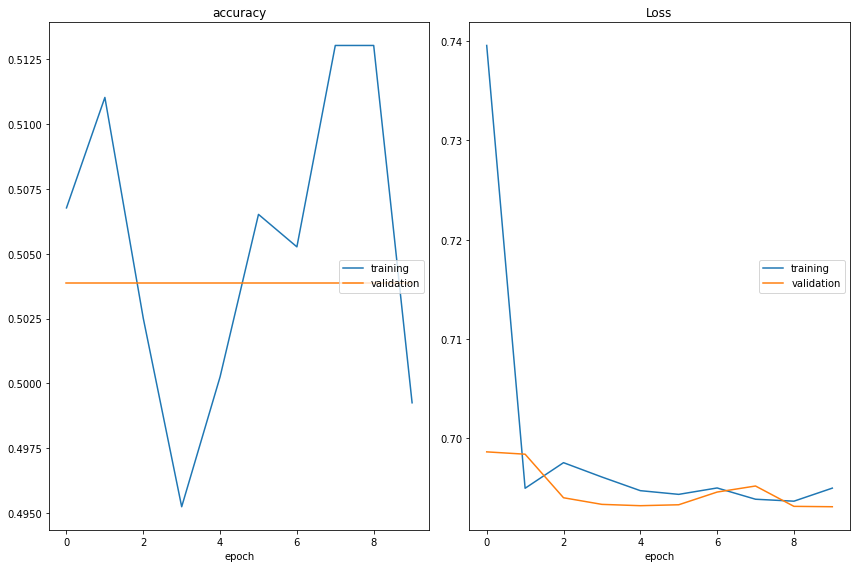

accuracy
	training         	 (min:    0.495, max:    0.513, cur:    0.499)
	validation       	 (min:    0.504, max:    0.504, cur:    0.504)
Loss
	training         	 (min:    0.694, max:    0.740, cur:    0.695)
	validation       	 (min:    0.693, max:    0.699, cur:    0.693)
125/125 [==============================] - 113s 902ms/step - loss: 0.6950 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5039


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath='tl_model_v2.weights.best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20,restore_best_weights=True, verbose=1, mode='min')
hist = model.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[checkpoint, early,PlotLossesCallback()],
                            verbose=1)

In [ ]:
model.load_weights('tl_model_v2.weights.best.hdf5')

In [ ]:
metrics = model.evaluate(test_generator)

5/5 [==============================] - 4s 600ms/step - loss: 0.6986 - accuracy: 0.5039


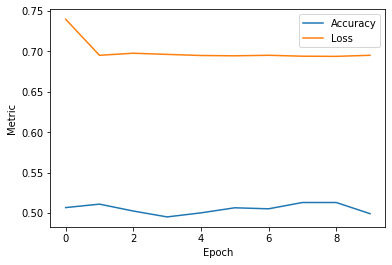

In [ ]:
history = hist.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

5/5 [==============================] - 4s 643ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("VGG16 Model Accuracy : {:.2f}%".format(model_acc * 100))

VGG16 Model Accuracy : 50.39%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

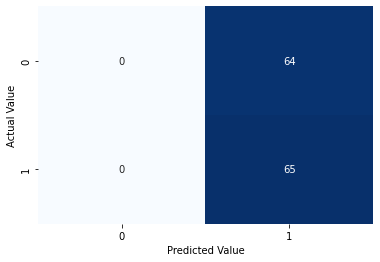

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.50      1.00      0.67        65

    accuracy                           0.50       129
   macro avg       0.25      0.50      0.34       129
weighted avg       0.25      0.50      0.34       129



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Data** **Augmentation**

In [ ]:
image_size = (224, 224)
batch_size = 64

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator( rescale = 1./255) 
# Create a generator for the training data
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)

# Create a generator for the test data
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


# **Resnet**

In [ ]:
def resnet(input_shape, n_classes):
  
  def conv_bn_rl(x, f, k=1, s=1, p='same'):
    x = Conv2D(f, k, strides=s, padding=p)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
  
  
  def identity_block(tensor, f):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, tensor])
    output = ReLU()(x)
    return output
  
  
  def conv_block(tensor, f, s):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3, s)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(4*f, 1, strides=s)(tensor)
    shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    output = ReLU()(x)
    return output
  
  
  def resnet_block(x, f, r, s=2):
    x = conv_block(x, f, s)
    for _ in range(r-1):
      x = identity_block(x, f)
    return x
    
  
  input = Input(input_shape)
  
  x = conv_bn_rl(input, 64, 7, 2)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = resnet_block(x, 64, 3, 1)
  x = resnet_block(x, 128, 4)
  x = resnet_block(x, 256, 6)
  x = resnet_block(x, 512, 3)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
resnet_model = resnet(img_shape,2)

In [ ]:
resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 112, 112, 64  9472        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_200 (Batch  (None, 112, 112, 64  256        ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_v3.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_3 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

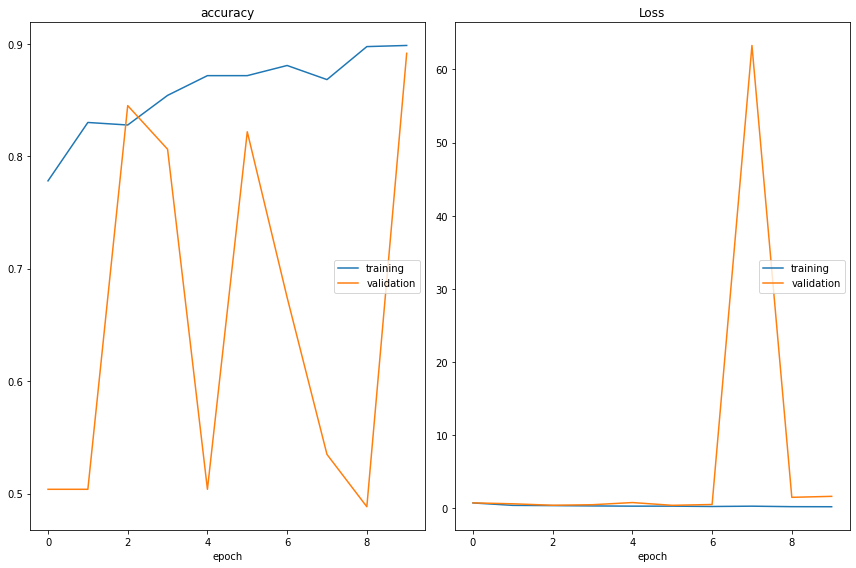

accuracy
	training         	 (min:    0.778, max:    0.898, cur:    0.898)
	validation       	 (min:    0.488, max:    0.891, cur:    0.891)
Loss
	training         	 (min:    0.224, max:    0.744, cur:    0.224)
	validation       	 (min:    0.417, max:   63.282, cur:    1.644)
63/63 [==============================] - 102s 2s/step - loss: 0.2236 - accuracy: 0.8984 - val_loss: 1.6438 - val_accuracy: 0.8915


In [ ]:
resnet_model_history  = resnet_model.fit(train_generator,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_3, early_stop_3,PlotLossesCallback()],
                            verbose=1)

In [ ]:
resnet_model.load_weights('tl_model_v3.weights.best.hdf5')

In [ ]:
metrics = resnet_model.evaluate(test_generator)

3/3 [==============================] - 2s 482ms/step - loss: 1.6438 - accuracy: 0.8915


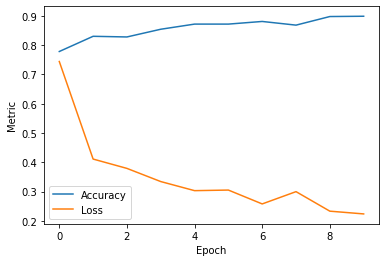

In [ ]:
history = resnet_model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = resnet_model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

3/3 [==============================] - 3s 606ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("ResNet Model Accuracy : {:.2f}%".format(model_acc * 100))

ResNet Model Accuracy : 89.15%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

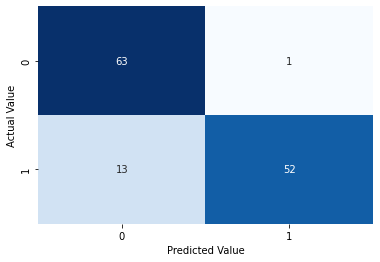

In [ ]:
from sklearn import metrics
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
from sklearn import metrics as mt

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        64
           1       0.98      0.80      0.88        65

    accuracy                           0.89       129
   macro avg       0.91      0.89      0.89       129
weighted avg       0.91      0.89      0.89       129



# **Mobile** **Net**

In [ ]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
mobilenet_model = mobilenet(img_shape,2)

In [ ]:
mobilenet_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_241 (Conv2D)         (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_253 (Ba  (None, 112, 112, 32)     128       
 tchNormalization)                                               
                                                                 
 re_lu_245 (ReLU)            (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d_13 (Depthw  (None, 112, 112, 32)     320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_254 (Ba  (None, 112, 112, 32)     128 

In [ ]:
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_4 = ModelCheckpoint(filepath='tl_model_v4.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_4 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

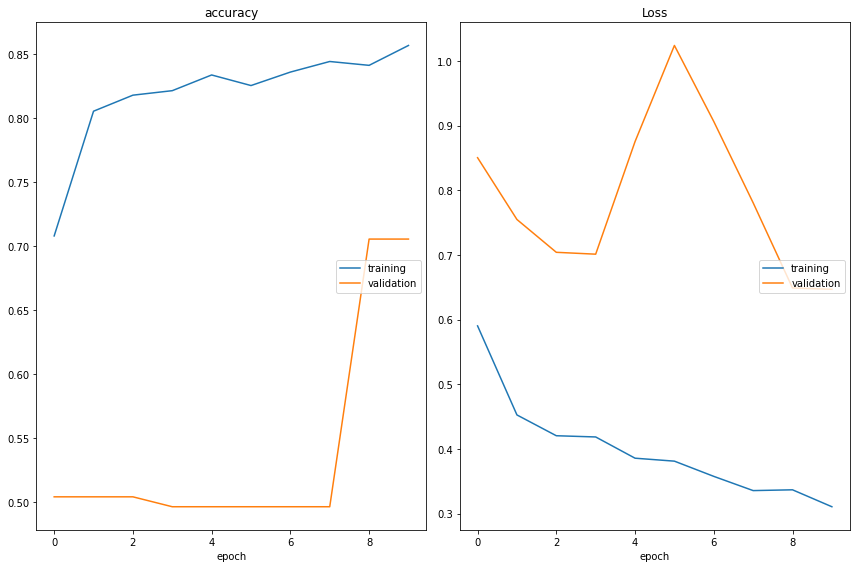

accuracy
	training         	 (min:    0.708, max:    0.857, cur:    0.857)
	validation       	 (min:    0.496, max:    0.705, cur:    0.705)
Loss
	training         	 (min:    0.311, max:    0.590, cur:    0.311)
	validation       	 (min:    0.647, max:    1.024, cur:    0.647)
63/63 [==============================] - 95s 2s/step - loss: 0.3105 - accuracy: 0.8568 - val_loss: 0.6468 - val_accuracy: 0.7054


In [ ]:
mobilenet_model_history  = mobilenet_model.fit(train_generator,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_4, early_stop_4,PlotLossesCallback()],
                            verbose=1)

In [ ]:
mobilenet_model.load_weights('tl_model_v4.weights.best.hdf5')

In [ ]:
metrics = mobilenet_model.evaluate(test_generator)

3/3 [==============================] - 2s 485ms/step - loss: 0.6488 - accuracy: 0.7054


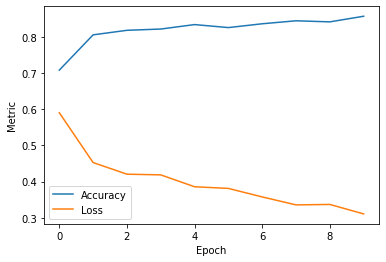

In [ ]:
history = mobilenet_model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = mobilenet_model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

3/3 [==============================] - 2s 516ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("MobileNet Model Accuracy : {:.2f}%".format(model_acc * 100))

MobileNet Model Accuracy : 70.54%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

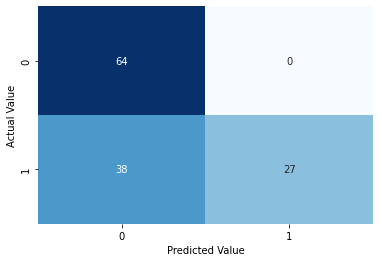

In [ ]:
from sklearn import metrics as mt 
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        64
           1       1.00      0.42      0.59        65

    accuracy                           0.71       129
   macro avg       0.81      0.71      0.68       129
weighted avg       0.82      0.71      0.68       129



# **Dense** **Net**

In [ ]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
densenet_model = densenet(img_shape,2)

In [ ]:
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_5 = ModelCheckpoint(filepath='tl_model_v5.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_5 = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True,
                           mode='min')

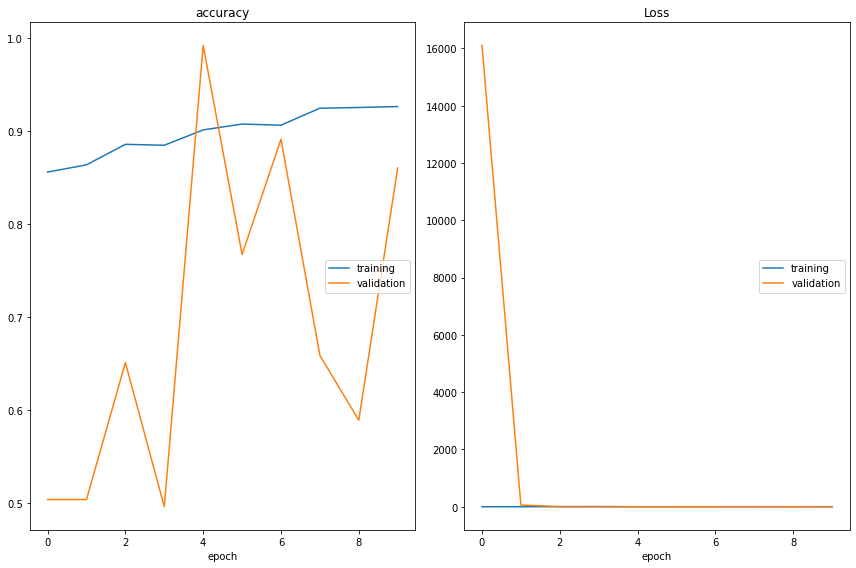

accuracy
	training         	 (min:    0.856, max:    0.927, cur:    0.927)
	validation       	 (min:    0.496, max:    0.992, cur:    0.860)
Loss
	training         	 (min:    0.160, max:    0.302, cur:    0.160)
	validation       	 (min:    0.111, max: 16105.250, cur:    3.190)
63/63 [==============================] - 102s 2s/step - loss: 0.1598 - accuracy: 0.9265 - val_loss: 3.1903 - val_accuracy: 0.8605


In [ ]:
densenet_model_history  = densenet_model.fit(train_generator,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_5, early_stop_5,PlotLossesCallback()],
                            verbose=1)

In [ ]:
densenet_model.load_weights('tl_model_v5.weights.best.hdf5')

In [ ]:
metrics = densenet_model.evaluate(test_generator)

3/3 [==============================] - 2s 472ms/step - loss: 0.1113 - accuracy: 0.9922


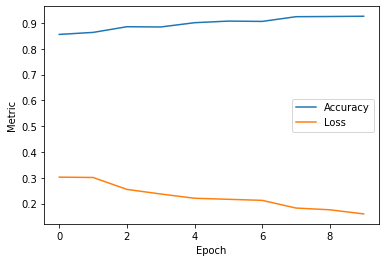

In [ ]:
history = densenet_model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = densenet_model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

3/3 [==============================] - 4s 591ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("DenseNet Model Accuracy : {:.2f}%".format(model_acc * 100))

DenseNet Model Accuracy : 99.22%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

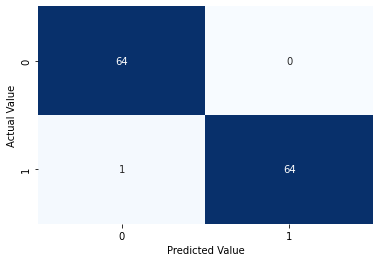

In [ ]:
from sklearn import metrics as mt 
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.98      0.99        65

    accuracy                           0.99       129
   macro avg       0.99      0.99      0.99       129
weighted avg       0.99      0.99      0.99       129

